# Aid Escalating Internet Coverage
Evaluation - 2 Code

# Importing Dependencies

Lets import all necessary librarires: -

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import nltk
import re
import json
from cleantext import clean
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("error")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import nltk
import re
import json
from cleantext import clean
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("error")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import make_pipeline
from sklearn import svm
warnings.filterwarnings("ignore", category=FutureWarning)
from pyexpat import model
from sklearn.ensemble import RandomForestRegressor
import xgboost
import shap
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from urllib.parse import urlparse
from sklearn.impute import SimpleImputer

Let's read our train and test csv files

In [152]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")
df_train.head()

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,is_news,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label
0,http://www.cbc.ca/stevenandchris/2012/11/peggy...,7426,"{""url"":""cbc ca stevenandchris 2012 11 peggy ks...",arts_entertainment,0.471752,1.725275,0.469388,0.204082,0.112245,0.010204,...,1,0,39,0,1236,98,8,0.061224,0.076125,1
1,http://www.instructables.com/id/Vegan-Baked-Po...,8430,"{""title"":""Vegan Potato Spinach Balls Fat Free ...",recreation,0.885088,0.847134,0.134783,0.043478,0.021739,0.000000,...,1,1,15,0,3887,230,8,0.330435,0.130742,1
2,http://www.oled-info.com/toshiba-shows-ultra-t...,3469,"{""title"":""Toshiba shows an ultra thin flexible...",business,0.716379,2.613333,0.546667,0.293333,0.160000,0.120000,...,1,1,57,0,780,75,8,0.160000,0.076471,0
3,http://www.collegehumor.com/videos/playlist/64...,1326,"{""url"":""collegehumor videos playlist 6472556 e...",arts_entertainment,0.562999,1.434286,0.369792,0.088542,0.000000,0.000000,...,1,0,35,0,2388,192,6,0.005208,0.090909,0
4,http://sports.yahoo.com/nba/blog/ball_dont_lie...,3580,"{""title"":""Shaq admits to taking performance en...",sports,0.893246,1.781333,0.530713,0.208845,0.071253,0.019656,...,1,1,39,0,5020,407,11,0.299754,0.093023,0


# Preprocessing : -

Quite a few '?' values in the dataset, lets replace that with NaN.

In [153]:
for column in df_train.columns:
    l = []
    l.append(column)
    df_train[df_train[l] == '?'] = np.nan

for col in df_test.columns:
    l = []
    l.append(col)
    df_test[df_test[l] == '?'] = np.nan

Lets check for NULL values

In [154]:
df_train.isna().sum()

link                                     0
link_id                                  0
page_description                         0
alchemy_category                      1397
alchemy_category_score                1397
avg_link_size                            0
common_word_link_ratio_1                 0
common_word_link_ratio_2                 0
common_word_link_ratio_3                 0
common_word_link_ratio_4                 0
compression_ratio                        0
embed_ratio                              0
frame_based                              0
frame_tag_ratio                          0
has_domain_link                          0
html_ratio                               0
image_ratio                              0
is_news                               1688
lengthy_link_domain                      0
link_word_score                          0
news_front_page                        727
non_markup_alphanumeric_characters       0
count_of_links                           0
number_of_w

For the alchemy_category feature, which is categorical, before one hot encoding, lets replace the null values with 'unknown' and see correlation of each of its possible values with the label, which will help us decide whether it is an important feature or not.

['arts_entertainment' 'recreation' 'business' 'sports' 'unknown'
 'culture_politics' 'computer_internet' 'religion' 'health'
 'science_technology' 'gaming' 'law_crime' 'weather']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'arts_entertainment'),
  Text(1, 0, 'recreation'),
  Text(2, 0, 'business'),
  Text(3, 0, 'sports'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'culture_politics'),
  Text(6, 0, 'computer_internet'),
  Text(7, 0, 'religion'),
  Text(8, 0, 'health'),
  Text(9, 0, 'science_technology'),
  Text(10, 0, 'gaming'),
  Text(11, 0, 'law_crime'),
  Text(12, 0, 'weather')])

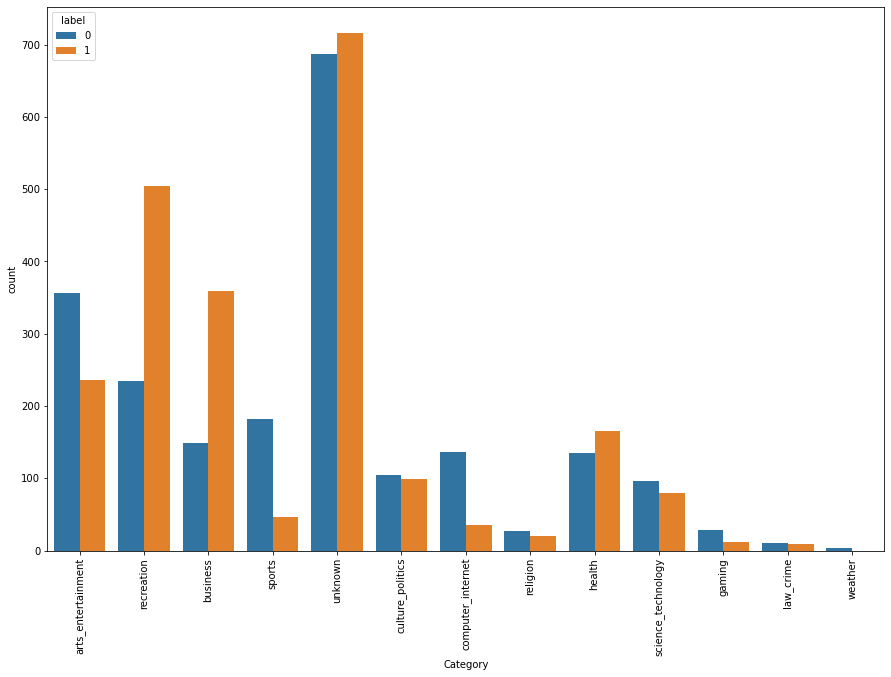

In [155]:
df_train['alchemy_category'] = df_train['alchemy_category'].replace(np.nan, 'unknown')
df_test['alchemy_category'] = df_test['alchemy_category'].replace(np.nan, 'unknown')
print(df_train['alchemy_category'].unique())
plt.figure(figsize=(15,10))
sns.countplot(x=df_train['alchemy_category'],hue=df_train['label'])
plt.xlabel('Category')
plt.xticks(rotation=90)

Clearly, there are few specific categories that have significant contribution to the output.

Therefore, let's one-hot encode our categorical non-textual feature, alchemy_category. And lets replace the non-categorical NULL values with their mean.

In [156]:
df_train['alchemy_category_score'] = df_train['alchemy_category_score'].astype(float)
df_test['alchemy_category_score'] = df_test['alchemy_category_score'].astype(float)
df_train['alchemy_category_score'].fillna(value=df_train['alchemy_category_score'].mean(), inplace=True)
df_test['alchemy_category_score'].fillna(value=df_test['alchemy_category_score'].mean(), inplace=True)

df_train['is_news'] = df_train['is_news'].astype(float)
df_test['is_news'] = df_test['is_news'].astype(float)
df_train['is_news'].fillna(value=df_train['is_news'].mean(), inplace=True)
df_test['is_news'].fillna(value=df_test['is_news'].mean(), inplace=True)

df_train['news_front_page'] = df_train['news_front_page'].astype(float)
df_test['news_front_page'] = df_test['news_front_page'].astype(float)
df_train['news_front_page'].fillna(value=df_train['news_front_page'].mean(), inplace=True)
df_test['news_front_page'].fillna(value=df_test['news_front_page'].mean(), inplace=True)

df_train = pd.get_dummies(df_train, columns = ['alchemy_category'])
df_test = pd.get_dummies(df_test, columns = ['alchemy_category'])

# Feature Selection : -

This is a very important step. With appropriate selection of important features, and discarding of not-important features, we can find a model with the best possible accuracy.

I will be following the post: - https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

The techniques I have used for analysing feature importance will be   
1.) Unsupervised methods (PCA)   
2.) Univariate Filtering technique (Logistic Regression)   
3.) Wrapper methods (Forward and Backward selection)  
4.) Tree based models to find feature importance (with xgboost)  
  
Each technique will be elaborated by me when I perform it.  
Also, the "url" and "page_description" textual features are not included in this section, as we will perform NLP on them to analyse their importance later. 

1.) Unsupervised feature groupingwith PCA.
Lets see whether the class labels are somewhat serperable if PCA is applied on the Dataset. 

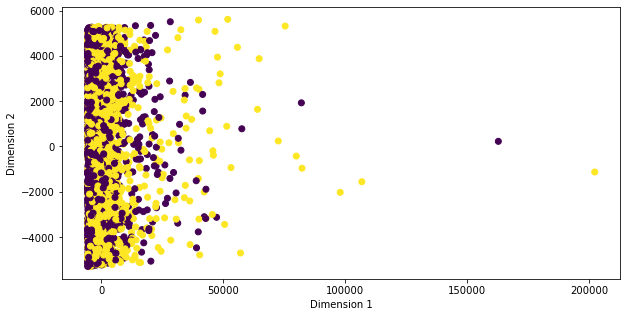

In [157]:
plt.figure(figsize=(10,5))
cols = list(df_train.columns)
cols.remove('page_description')
cols.remove('link')
cols.remove('label')
X_PCA = df_train.loc[:, cols].values
Y_PCA = df_train.loc[:, ['label']].values
X_PCA = PCA().fit_transform(X_PCA)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=Y_PCA)

Therefore, we can see the data is somewhat random. It is not serperable on the Y-axis or the X-axis.

2.) Univariate Filtering technique.  
I will use a Logistic Regression model to fit each feature with the class label. This is not the best method for multiple features as it completely sidelines covariance and multi-variable models accuracy, but it does help in finding few features, if they exist, that have very high correlation with the class label.

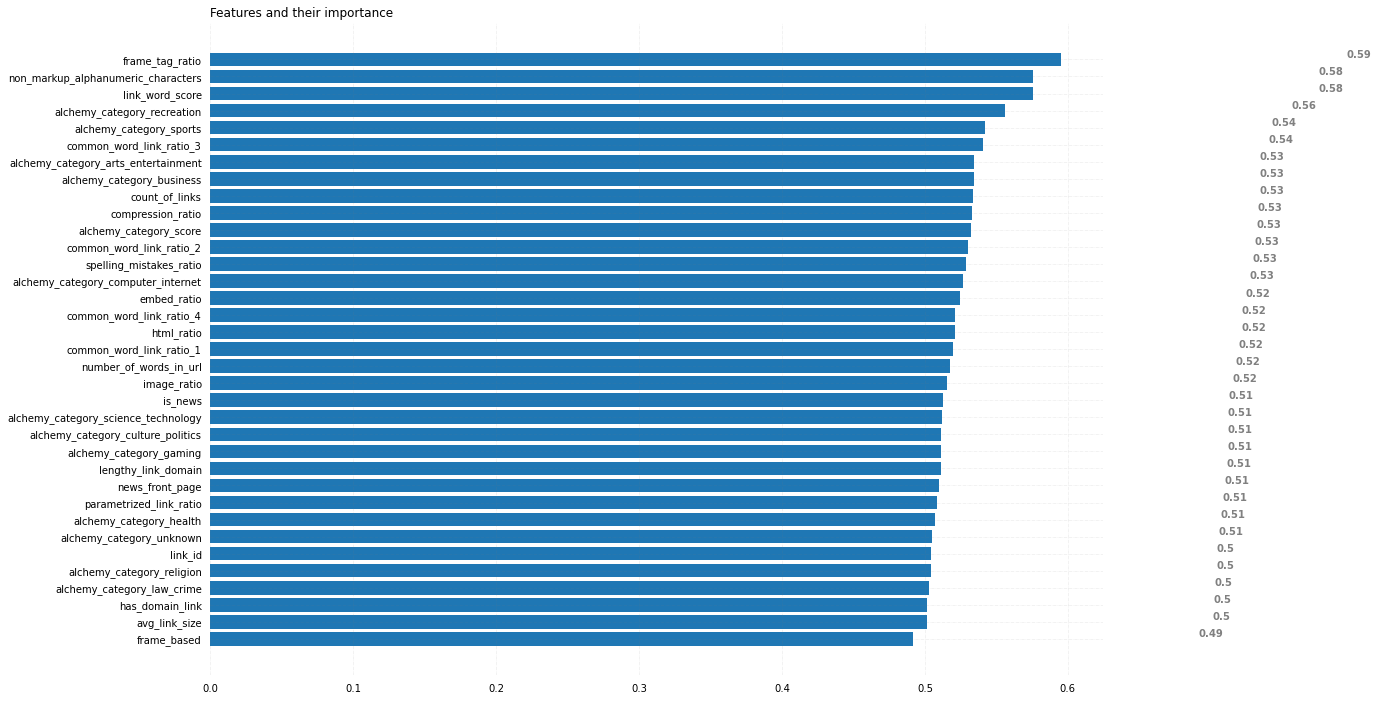

In [158]:
Scores = []
for feature in df_train.columns:
	if feature != "link" and feature != "page_description" and feature != "alchemy_category" and feature != "label":
		model = LogisticRegression(solver='saga')
		X = df_train[feature].to_numpy()
		Y = df_train["label"].to_numpy()
		scale = StandardScaler()
		X = scale.fit_transform(X.reshape(-1, 1))
		x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.35)
		try:
			model.fit(x_train.reshape(-1, 1), y_train)
			predictions = model.predict(x_test.reshape(-1, 1))
			roc_auc_score_feature = roc_auc_score(y_test, predictions)
			# print(feature, "ROC-AUC score is", roc_auc_score_feature)
			Logistic_regression_score = model.score(x_test.reshape(-1, 1), y_test)
			# print(feature, Logistic_regression_score, roc_auc_score_feature)
			Scores.append((Logistic_regression_score + roc_auc_score_feature) / 2)
		except:
			# print(feature, "Could not converge")
			Scores.append(0)
df_columns = df_train.columns.to_list()
df_columns.remove("link")
df_columns.remove("page_description")
df_columns.remove("label")
list_new = []
for i in range(len(df_columns)):
	if Scores[i] != 0:
		list_new.append([df_columns[i], Scores[i]])
list_new = np.array(sorted(list_new, key=lambda x:x[1]))
# plt.barh(list_new[:,0], list_new[:,1])
# plt.show()

fig, ax = plt.subplots(figsize =(16, 12))
ax.barh(list_new[:,0], [float(i) for i in list_new[:,1]])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title('Features and their importance',
             loc ='left')
plt.show()

Takeaways: -  
There are no standout features with a roc_score more than 0.75. Highest is 0.6 infact.  
Therefore, we must do some sort of multivariable filtering to see what model and what selection of features gives the highest accuracy.

3.) Wrapper functions.  
I will be using the 3rd party library, mlxtend to perform its feature selection functions, by using Exhaustive forward searching, Sequential forward, and backward searching, with and without floating flag selection.

In [159]:
LR = LogisticRegression()
SVM = svm.SVC(kernel='rbf')
clf = make_pipeline(StandardScaler(), SVM)
X_FS = df_train.loc[:, cols].values
Y_FS = df_train.loc[:, ['label']].values

# EFS_LR = EFS(LR, min_features = 1, max_features = len(cols), scoring='roc_auc', print_progress=True, cv=5)
# EFS_LR.fit(X_FS, Y_FS.ravel())
# print('Best accuracy score: %.2f' % EFS_LR.best_score_)
# print('Best subset (indices):', EFS_LR.best_idx_)
# print('Best subset (corresponding names):', EFS_LR.best_feature_names_)

SFS_LR = SFS(LR, k_features=(1, len(cols)), forward=True, floating=False, scoring='roc_auc', cv=4, n_jobs=-1)
SFS_LR.fit(X_FS, Y_FS.ravel())
print('\nSequential Forward Selection:')
print(SFS_LR.k_feature_idx_)
print('CV Score:')
print(SFS_LR.k_score_)


Sequential Forward Selection:
(1, 3, 4, 5, 9, 10, 11, 12, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35)
CV Score:
0.7031114327047892


Takeaways: -  
The output shows SFS search gave a maximum roc score of 0.70, when it chose features with the index list shown in the output.  
The model used was Logistic Regression, as a SVM with a linear kernel, a SVM with a RBF kernel gave very low roc scores, and a RandomForestRegressor had a close but slightly smaller roc score.  
Exhaustive forward search had extremly slow convergence, so it is commented.  
SBS didn't converge, therefore, its code has been removed. And neither did it converge with the floating=True flag.

4.) Tree based model feature importance.  
I have used an XGBoost model for our data.  

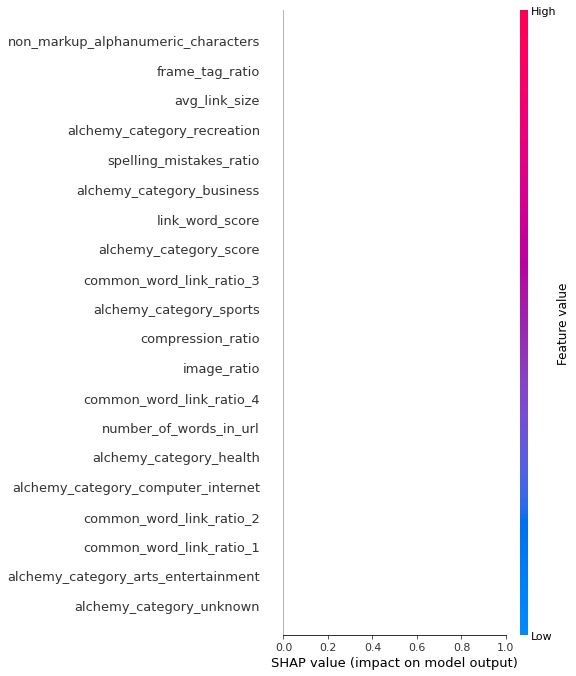

In [160]:
XGBoost_Model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(df_train[cols], label=df_train['label']), 100)
shap.initjs()
model_explainer = shap.TreeExplainer(XGBoost_Model)
shap_values = model_explainer.shap_values(df_train[cols])

shap.summary_plot(shap_values, df_train[cols], plot_type="Bar")

Takeaways: -  
This modelling technique for feature selection is used to solve the  slow convergence or no convergence issues of step 3.  
The problem is, the model punishes features with high covariance among themselves. 
Therefore, we can see some features match our expected importance from step 3, and some do not.  
But due to the covariance penalisation issue, we use the result from step 3 moving forward.

Our SFS_cols list stores the features which SFS used to get the highest roc score.

In [161]:
SFS_cols = [cols[col_id] for col_id in SFS_LR.k_feature_idx_]
print(SFS_cols)

['alchemy_category_score', 'common_word_link_ratio_1', 'common_word_link_ratio_2', 'common_word_link_ratio_3', 'frame_based', 'frame_tag_ratio', 'has_domain_link', 'html_ratio', 'link_word_score', 'news_front_page', 'non_markup_alphanumeric_characters', 'count_of_links', 'parametrized_link_ratio', 'spelling_mistakes_ratio', 'alchemy_category_arts_entertainment', 'alchemy_category_business', 'alchemy_category_computer_internet', 'alchemy_category_culture_politics', 'alchemy_category_gaming', 'alchemy_category_health', 'alchemy_category_law_crime', 'alchemy_category_recreation', 'alchemy_category_religion', 'alchemy_category_sports', 'alchemy_category_unknown', 'alchemy_category_weather']


news_front_page had quite a few missing values, therefore, we will drop the column.  
frame_based has only 1 value, 0. Therefore, we will drop that column.  
There are not many weather alchemy category types, hence, we will drop it.

In [162]:
SFS_cols.remove('news_front_page')
SFS_cols.remove('frame_based')
SFS_cols.remove('alchemy_category_weather')
SFS_cols_categorical = ['has_domain_link', 'alchemy_category_arts_entertainment', 'alchemy_category_business', 'alchemy_category_computer_internet', 'alchemy_category_culture_politics', 'alchemy_category_gaming', 'alchemy_category_health', 'alchemy_category_law_crime', 'alchemy_category_recreation', 'alchemy_category_religion', 'alchemy_category_sports', 'alchemy_category_unknown']
SFS_cols_not_categorical = ['alchemy_category_score', 'common_word_link_ratio_1', 'common_word_link_ratio_2', 'common_word_link_ratio_3', 'frame_tag_ratio', 'html_ratio', 'link_word_score', 'non_markup_alphanumeric_characters', 'count_of_links', 'parametrized_link_ratio', 'spelling_mistakes_ratio']
print(SFS_cols)

['alchemy_category_score', 'common_word_link_ratio_1', 'common_word_link_ratio_2', 'common_word_link_ratio_3', 'frame_tag_ratio', 'has_domain_link', 'html_ratio', 'link_word_score', 'non_markup_alphanumeric_characters', 'count_of_links', 'parametrized_link_ratio', 'spelling_mistakes_ratio', 'alchemy_category_arts_entertainment', 'alchemy_category_business', 'alchemy_category_computer_internet', 'alchemy_category_culture_politics', 'alchemy_category_gaming', 'alchemy_category_health', 'alchemy_category_law_crime', 'alchemy_category_recreation', 'alchemy_category_religion', 'alchemy_category_sports', 'alchemy_category_unknown']


# NLP

Now lets shift our attention to the textual columns, "link" and "page_description". Lets preprocess those cloumns, starting with "page_description"

In [163]:
CLEANR = re.compile('<.*?>')

def preprocess_text(text, html=True, clean_all=True, extra_spaces=True, stemming=False, stopwords=False, lowercase=True, numbers=False, punct=False):
    if html:
        text = re.sub(CLEANR, ' ', text)
    
    txt_list = []
    [txt_list.append(x) for x in text.split() if x not in txt_list]
    text = ' '.join(txt_list)
    text = clean(text, clean_all=clean_all, extra_spaces=extra_spaces, stemming=stemming, stopwords=stopwords, lowercase=lowercase, numbers=numbers, punct=punct, stp_lang='english')
    return text

l_train = []
for i in df_train.page_description.values:
    st = ''
    txt = json.loads(i)
    if 'title' in txt.keys():
        if type(txt['title']) != type(None):
            st += txt['title']
    l_train.append(st)
df_train['text_title'] = l_train

l_test = []
for i in df_test.page_description.values:
    st = ''
    txt = json.loads(i)
    if 'title' in txt.keys():
        if type(txt['title']) != type(None):
            st += txt['title']
    l_test.append(st)
df_test['text_title'] = l_test

l_train = []
for i in df_train.page_description.values:
    st = ''
    txt = json.loads(i)
    if 'url' in txt.keys():
        if type(txt['url']) != type(None):
            st += txt['url']
    l_train.append(st)
df_train['text_url'] = l_train

l_test = []
for i in df_test.page_description.values:
    st = ''
    txt = json.loads(i)
    if 'url' in txt.keys():
        if type(txt['url']) != type(None):
            st += txt['url']
    l_test.append(st)
df_test['text_url'] = l_test

l_train = []
for i in df_train.page_description.values:
    st = ''
    txt = json.loads(i)
    if 'body' in txt.keys():
        if type(txt['body']) != type(None):
            st += txt['body']
    l_train.append(st)
df_train['text_body'] = l_train

l_test = []
for i in df_test.page_description.values:
    st = ''
    txt = json.loads(i)
    if 'body' in txt.keys():
        if type(txt['body']) != type(None):
            st += txt['body']
    l_test.append(st)
df_test['text_body'] = l_test

In [164]:
l = []
for i in tqdm(df_train.text_title, total=len(df_train)):
    try:
        l.append(preprocess_text(i))
    except:
        l.append("not found")
        pass
df_train.text_title = l

l = []
for i in tqdm(df_test.text_title, total=len(df_test)):
    try:
        l.append(preprocess_text(i))
    except:
        l.append("not found")
        pass
df_test.text_title = l

l = []
for i in tqdm(df_train.text_url, total=len(df_train)):
    try:
        l.append(preprocess_text(i))
    except:
        l.append("not found")
        pass
df_train.text_url = l

l = []
for i in tqdm(df_test.text_url, total=len(df_test)):
    try:
        l.append(preprocess_text(i))
    except:
        l.append("not found")
        pass
df_test.text_url = l

l = []
for i in tqdm(df_train.text_body, total=len(df_train)):
    try:
        l.append(preprocess_text(i))
    except:
        l.append("not found")
        pass
df_train.text_body = l

l = []
for i in tqdm(df_test.text_body, total=len(df_test)):
    try:
        l.append(preprocess_text(i))
    except:
        l.append("not found")
        pass
df_test.text_body = l

100%|██████████| 2958/2958 [00:03<00:00, 795.25it/s]


In [165]:
text_list = []
for text in df_train.text_title:
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = [w for w in text if not w in stop_words] 
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text_list.append(text)
df_train.text_title = text_list

text_list_test = []
for text in df_test.text_title:
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text= [w for w in text if not w in stop_words] 
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text_list_test.append(text)
df_test.text_title = text_list_test

text_list = []
for text in df_train.text_url:
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = [w for w in text if not w in stop_words] 
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text_list.append(text)
df_train.text_url = text_list

text_list_test = []
for text in df_test.text_url:
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text= [w for w in text if not w in stop_words] 
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text_list_test.append(text)
df_test.text_url = text_list_test

text_list = []
for text in df_train.text_body:
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = [w for w in text if not w in stop_words] 
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text_list.append(text)
df_train.text_body = text_list

text_list_test = []
for text in df_test.text_body:
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text= [w for w in text if not w in stop_words] 
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text_list_test.append(text)
df_test.text_body = text_list_test

Now we have successfully parsed the page_description feature, preprocessed the text the stored them in the text_title, text_url, text_body columns newly made.

Now lets parse the link column and store it in the parsed_link column

In [166]:
from urllib.parse import urlparse

l = []
for i in range(0, len(df_train)):
	url = df_train['link'][i]
	parsed_url = urlparse(url)
	scheme = parsed_url.scheme
	netloc = parsed_url.netloc
	path = parsed_url.path
	params = parsed_url.params
	query = parsed_url.query
	fragment = parsed_url.fragment

	parsed_url_str = " ".join([scheme, netloc, path, params, query, fragment])
	parsed_url_str = preprocess_text(parsed_url_str)
	parsed_url_str = re.sub("[^a-zA-Z]", " ", parsed_url_str)
	parsed_url_str = nltk.word_tokenize(parsed_url_str)
	stop_words = set(stopwords.words('english'))
	parsed_url_str = [w for w in parsed_url_str if not w in stop_words] 
	lemma = nltk.WordNetLemmatizer()
	parsed_url_str = [lemma.lemmatize(word) for word in parsed_url_str]
	parsed_url_str = " ".join(parsed_url_str)
	l.append(parsed_url_str)
df_train['parsed_link'] = l

l = []
for i in range(0, len(df_test)):
	url = df_test['link'][i]
	parsed_url = urlparse(url)
	scheme = parsed_url.scheme
	netloc = parsed_url.netloc
	path = parsed_url.path
	params = parsed_url.params
	query = parsed_url.query
	fragment = parsed_url.fragment

	parsed_url_str = " ".join([scheme, netloc, path, params, query, fragment])
	parsed_url_str = preprocess_text(parsed_url_str)
	parsed_url_str = re.sub("[^a-zA-Z]", " ", parsed_url_str)
	parsed_url_str = nltk.word_tokenize(parsed_url_str)
	stop_words = set(stopwords.words('english'))
	parsed_url_str = [w for w in parsed_url_str if not w in stop_words] 
	lemma = nltk.WordNetLemmatizer()
	parsed_url_str = [lemma.lemmatize(word) for word in parsed_url_str]
	parsed_url_str = " ".join(parsed_url_str)
	l.append(parsed_url_str)
df_test['parsed_link'] = l

In [167]:
df_train.head()

,link,link_id,page_description,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,...,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,text_title,text_url,text_body,parsed_link
0,http://www.cbc.ca/stevenandchris/2012/11/peggy...,7426,"{""url"":""cbc ca stevenandchris 2012 11 peggy ks...",0.471752,1.725275,0.469388,0.204082,0.112245,0.010204,0.478691,...,0,0,0,0,0,0,steven chris peggy k sexy mood boosting cupcak...,cbc ca stevenandchris peggy k sexy mood boosti...,ready give libido boost sweet treat going want...,http www cbc ca stevenandchris peggy k sexy mo...
1,http://www.instructables.com/id/Vegan-Baked-Po...,8430,"{""title"":""Vegan Potato Spinach Balls Fat Free ...",0.885088,0.847134,0.134783,0.043478,0.021739,0.000000,0.459059,...,1,0,0,0,0,0,vegan potato spinach ball fat free vegan potat...,instructables id vegan baked potato amp spinac...,function makehelpbubbletextfav anchor return a...,http www instructables com id vegan baked pota...
2,http://www.oled-info.com/toshiba-shows-ultra-t...,3469,"{""title"":""Toshiba shows an ultra thin flexible...",0.716379,2.613333,0.546667,0.293333,0.160000,0.120000,0.550314,...,0,0,0,0,0,0,toshiba show ultra thin flexible oled display ...,oled info toshiba show ultra thin flexible dis...,update info new photo toshiba flexible oled pr...,http www oled info com toshiba show ultra thin...
3,http://www.collegehumor.com/videos/playlist/64...,1326,"{""url"":""collegehumor videos playlist 6472556 e...",0.562999,1.434286,0.369792,0.088542,0.000000,0.000000,0.675824,...,0,0,0,0,0,0,epic sport fails collegehumor video playlist e...,collegehumor video playlist epic sport fails,biggest fail paying million dollar watch epic ...,http www collegehumor com video playlist epic ...
4,http://sports.yahoo.com/nba/blog/ball_dont_lie...,3580,"{""title"":""Shaq admits to taking performance en...",0.893246,1.781333,0.530713,0.208845,0.071253,0.019656,0.932692,...,0,0,0,1,0,0,shaq admits taking performance enhancing cerea...,sport yahoo nba blog ball dont lie post shaq a...,comprehensive national basketball association ...,http sport yahoo com nba blog ball dont lie po...


# Model Ensemble

Now lets try a few models and test their accuracy.  
## Model 1 (ROC SCORE 0.87634)  
I have used the Tfidf vectorizer in the the textual data pipeline and a linear classifier is used at the end of the ColumnTransformer.  

In [168]:
vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()
vectorizer3 = TfidfVectorizer()

column_transformer = ColumnTransformer([('tfidf1', vectorizer1, 'text_title'), ('tfidf2', vectorizer2, 'text_url'), ('tfidf3', vectorizer3, 'text_body')], remainder='passthrough')
pipe = Pipeline([('tfidf', column_transformer), ('logistic_regression', LogisticRegression())])
pipe.fit(df_train[['text_title', 'text_url', 'text_body']], df_train['label'])
predictions = pipe.predict_proba(df_test[['text_title', 'text_url', 'text_body']])[:, 1]
print(predictions)
pred_df = pd.DataFrame(predictions, index=df_test.link_id, columns=['label'])
pred_df.to_csv('submission_pipeline_no_url_LR.csv')
pred_df.head()

[0.89196903 0.24151221 0.43480787 ... 0.25224833 0.41929032 0.30737405]


,label
link_id,
4049,0.891969
3692,0.241512
9739,0.434808
1548,0.741270
5574,0.969916


This gave a roc score of 0.87634 on kaggle, which is better than our evaluation 1's submission as we have counted the body as well.

## Model 2 (ROC SCORE 0.87634)
On inspection, our textual data, has some single letter data, and also some words not there in the nltk dictionary.

In [169]:
nltk.download('words')
words = set(nltk.corpus.words.words())
l_title = []
l_url = []
l_body = []
for i in range(0, len(df_train)):
	# if i % 500 == 0:
	# 	print(i, df_train['text_title'][i], df_train['text_url'][i], df_train['text_body'][i], sep = "\n")
	l_title.append(' '.join([w for w in df_train['text_title'][i].split() if len(w)>1]))
	l_url.append(' '.join([w for w in df_train['text_url'][i].split() if len(w)>1]))
	l_body.append(' '.join([w for w in df_train['text_body'][i].split() if len(w)>1]))

	# l_title[len(l_title) - 1] = " ".join(w for w in nltk.wordpunct_tokenize(l_title[len(l_title) - 1]) if w.lower() in words or not w.isalpha())
	# l_url[len(l_url) - 1] = " ".join(w for w in nltk.wordpunct_tokenize(l_url[len(l_url) - 1]) if w.lower() in words or not w.isalpha())
	# l_body[len(l_body) - 1] = " ".join(w for w in nltk.wordpunct_tokenize(l_body[len(l_body) - 1]) if w.lower() in words or not w.isalpha())
df_train['text_title'] = l_title
df_train['text_url'] = l_url
df_train['text_body'] = l_body

l_title = []
l_url = []
l_body = []
for i in range(0, len(df_test)):
	# if i % 500 == 0:
	# 	print(i, df_train['text_title'][i], df_train['text_url'][i], df_train['text_body'][i], sep = "\n")
	l_title.append(' '.join([w for w in df_test['text_title'][i].split() if len(w)>1]))
	l_url.append(' '.join([w for w in df_test['text_url'][i].split() if len(w)>1]))
	l_body.append(' '.join([w for w in df_test['text_body'][i].split() if len(w)>1]))

	# l_title[len(l_title) - 1] = " ".join(w for w in nltk.wordpunct_tokenize(l_title[len(l_title) - 1]) if w.lower() in words or not w.isalpha())
	# l_url[len(l_url) - 1] = " ".join(w for w in nltk.wordpunct_tokenize(l_url[len(l_url) - 1]) if w.lower() in words or not w.isalpha())
	# l_body[len(l_body) - 1] = " ".join(w for w in nltk.wordpunct_tokenize(l_body[len(l_body) - 1]) if w.lower() in words or not w.isalpha())
df_test['text_title'] = l_title
df_test['text_url'] = l_url
df_test['text_body'] = l_body

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [170]:
pipe = Pipeline([('tfidf', column_transformer), ('logistic_regression', LogisticRegression())])
# pipe = Pipeline([('tfidf', column_transformer), ('svm', svm.SVC(kernel="rbf"))])
# pipe = Pipeline([('tfidf', column_transformer), ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))])
pipe.fit(df_train[['text_title', 'text_url', 'text_body']], df_train['label'])
predictions = pipe.predict_proba(df_test[['text_title', 'text_url', 'text_body']])[:, 1]
# predictions = pipe.predict(df_test[['text_title', 'text_url', 'text_body']])
print(predictions)
pred_df = pd.DataFrame(predictions, index=df_test.link_id, columns=['label'])
pred_df.to_csv('submission_pipeline_no_url_LR_no_single_letters.csv')
pred_df.head()

[0.89196903 0.24151221 0.43480787 ... 0.25224833 0.41929032 0.30737405]


,label
link_id,
4049,0.891969
3692,0.241512
9739,0.434808
1548,0.741270
5574,0.969916


The roc score was unaltered on removing 1 letter words. (87.643) 
The roc score droppedon removing non-vocabulary words, therefore, that section has been commented.

## Model 3 (ROC SCORE 0.87504)
Before, we excluded the parsed_url part, now we will include it in the column transformer and see the results.

In [171]:
vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()
vectorizer3 = TfidfVectorizer()
vectorizer4 = TfidfVectorizer()

column_transformer = ColumnTransformer([('tfidf1', vectorizer1, 'text_title'), ('tfidf2', vectorizer2, 'text_url'), ('tfidf3', vectorizer3, 'text_body'), ('tfidf4', vectorizer4, 'parsed_link')], remainder='passthrough')
pipe = Pipeline([('tfidf', column_transformer), ('logistic_regression', LogisticRegression())])

df_local_train, df_local_test = train_test_split(df_train, shuffle=True, test_size=0.3)
pipe.fit(df_local_train[['text_title', 'text_url', 'text_body', 'parsed_link']], df_local_train['label'])
predictions = pipe.predict(df_local_test[['text_title', 'text_url', 'text_body', 'parsed_link']])
roc_auc_score_pipeline = roc_auc_score(df_local_test['label'], predictions)
print(roc_auc_score_pipeline)

pipe.fit(df_train[['text_title', 'text_url', 'text_body', 'parsed_link']], df_train['label'])
predictions = pipe.predict_proba(df_test[['text_title', 'text_url', 'text_body', 'parsed_link']])[:, 1]
print(predictions)
pred_df = pd.DataFrame(predictions, index=df_test.link_id, columns=['label'])
pred_df.to_csv('submission_pipeline_with_url_LR.csv')
pred_df.head()

0.8044575045207957
[0.91092243 0.23591797 0.38782026 ... 0.21605735 0.42444132 0.27184582]


,label
link_id,
4049,0.910922
3692,0.235918
9739,0.387820
1548,0.766096
5574,0.977518


## Model 4: - (Best Model so far, ROC SCORE 0.88243)  
To increase our accuracy, what I will do now is exclude the pipelined structure and create my own.  
I will combine all the columns, text_title, text_url, text_body, parsed_link, into 1 column called Complete_Textual_Data.  
Now I will build ONE Tfidf Vectorizer which fits the the entire vocabulary of BOTH the train and test data and then perform transformations on the components.

In [172]:
l = []
for i in range(0, len(df_train)):
	l.append(" ".join([df_train["text_title"][i], df_train["text_url"][i], df_train["text_body"][i], df_train["parsed_link"][i]]))
df_train['Complete_Textual_Data'] = l

l = []
for i in range(0, len(df_test)):
	l.append(" ".join([df_test["text_title"][i], df_test["text_url"][i], df_test["text_body"][i], df_test["parsed_link"][i]]))
df_test['Complete_Textual_Data'] = l

SFS_cols.append('Complete_Textual_Data')

vectorizer = TfidfVectorizer()
df_local_train, df_local_test = train_test_split(df_train, shuffle=True, test_size=0.3)
model = LogisticRegression()
vectorizer.fit_transform(df_train.Complete_Textual_Data.values).toarray()
X_train_tfidf = vectorizer.transform(df_local_train['Complete_Textual_Data']).toarray()
X_test_tfidf = vectorizer.transform(df_local_test['Complete_Textual_Data']).toarray()

LR_model = LogisticRegression()
LR_model.fit(X_train_tfidf, df_local_train['label'])

predictions = LR_model.predict(X_test_tfidf)
roc_score = roc_auc_score(df_local_test['label'], predictions)
print(roc_score)

vectorizer = TfidfVectorizer()
model = LogisticRegression()
print(type(df_train.Complete_Textual_Data.values))
vectorizer.fit_transform(np.concatenate((df_train.Complete_Textual_Data.values, df_test.Complete_Textual_Data.values)))

X_train = vectorizer.transform(df_train['Complete_Textual_Data'])
X_test = vectorizer.transform(df_test['Complete_Textual_Data'])

LR_model = LogisticRegression()
LR_model.fit(X_train, df_train['label'])

predictions = LR_model.predict_proba(X_test)[:, 1]
print(len(predictions))
pred_df = pd.DataFrame(predictions, index=df_test.link_id, columns=['label'])
pred_df.to_csv('submission_mypipeline_LR.csv')
pred_df.head()

0.8056164801282992
<class 'numpy.ndarray'>
2958


,label
link_id,
4049,0.883630
3692,0.228657
9739,0.417026
1548,0.528183
5574,0.915144


This gave a roc score of 88.23 on kaggle.

## Model 5 (ROC SCORE 0.86407)
Now, I would include the non-textual data too in the model. My model includes a Tfidf Pipeline for textual data, a one-hot-encoder for categorical data, and a median imputer followed by standard scaling for non categorical features which is then fed to a linear classifier(SVM, RandomForestRegressor, LinearRegression) by a Column Transformer architecture.

In [173]:
print(SFS_cols)
print(SFS_cols_categorical)
print(SFS_cols_not_categorical)

['alchemy_category_score', 'common_word_link_ratio_1', 'common_word_link_ratio_2', 'common_word_link_ratio_3', 'frame_tag_ratio', 'has_domain_link', 'html_ratio', 'link_word_score', 'non_markup_alphanumeric_characters', 'count_of_links', 'parametrized_link_ratio', 'spelling_mistakes_ratio', 'alchemy_category_arts_entertainment', 'alchemy_category_business', 'alchemy_category_computer_internet', 'alchemy_category_culture_politics', 'alchemy_category_gaming', 'alchemy_category_health', 'alchemy_category_law_crime', 'alchemy_category_recreation', 'alchemy_category_religion', 'alchemy_category_sports', 'alchemy_category_unknown', 'Complete_Textual_Data']
['has_domain_link', 'alchemy_category_arts_entertainment', 'alchemy_category_business', 'alchemy_category_computer_internet', 'alchemy_category_culture_politics', 'alchemy_category_gaming', 'alchemy_category_health', 'alchemy_category_law_crime', 'alchemy_category_recreation', 'alchemy_category_religion', 'alchemy_category_sports', 'alchem

In [174]:
vectorizer = TfidfVectorizer()
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
column_transformer = ColumnTransformer(transformers=[('tfidf', vectorizer, 'Complete_Textual_Data'), ('num', numeric_transformer, SFS_cols_not_categorical), ('cat', 'passthrough', SFS_cols_categorical)])
# clf = Pipeline(steps=[("preprocessor", column_transformer), ("classifier", LogisticRegression())])
clf = Pipeline(steps=[("preprocessor", column_transformer), ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))])
clf.fit(df_train[SFS_cols], df_train['label'])

predictions = clf.predict(df_test[SFS_cols])
print(predictions)
pred_df = pd.DataFrame(predictions, index=df_test.link_id, columns=['label'])
pred_df.to_csv('submission_pipeline_nontextual_RF.csv')
pred_df.head()

[0.94192242 0.28317085 0.30665191 ... 0.19393447 0.21960383 0.19138055]


,label
link_id,
4049,0.941922
3692,0.283171
9739,0.306652
1548,0.527948
5574,0.926341


This model could not converge with LR, SVM, had slow convergence with RF, and low Roc Score as well, and from later visualisations we can see that this is because the data along the non-textual-columns are not highly linearly seperable.

SFS_new is the list of all important features used by our model, minus 'Complete_Textual_Data', as we usually include that in a Tfidf Pipeline which is seprate from how we deal with the other data.

In [175]:
import copy
SFS_new = copy.copy(SFS_cols)
SFS_new.remove('Complete_Textual_Data')
print(SFS_new)

['alchemy_category_score', 'common_word_link_ratio_1', 'common_word_link_ratio_2', 'common_word_link_ratio_3', 'frame_tag_ratio', 'has_domain_link', 'html_ratio', 'link_word_score', 'non_markup_alphanumeric_characters', 'count_of_links', 'parametrized_link_ratio', 'spelling_mistakes_ratio', 'alchemy_category_arts_entertainment', 'alchemy_category_business', 'alchemy_category_computer_internet', 'alchemy_category_culture_politics', 'alchemy_category_gaming', 'alchemy_category_health', 'alchemy_category_law_crime', 'alchemy_category_recreation', 'alchemy_category_religion', 'alchemy_category_sports', 'alchemy_category_unknown']


## Model 6 :- (ROC SCORE 0.88036)
Now, similar to how we dealt with Textual Data, I would use the same model as before, only this time I would remove 'Complete_Textual_Data' from out of my Pipeline and build my own implementation of it. The point is to make a TfidfVectorizer() that builds a vocabulary and dictionary jointly for both the test and train data and then for each individual component(train or test data) we would find their transofrmations by calling the transform() function on the vectorizer.

In [176]:
column_transformer_no_text = ColumnTransformer(transformers=[('num', numeric_transformer, SFS_cols_not_categorical), ('cat', 'passthrough', SFS_cols_categorical)])
# classifier_no_text = Pipeline(steps=[("preprocessor", column_transformer_no_text), ('svm', svm.SVC(kernel='rbf'))])
# classifier_no_text = Pipeline(steps=[("preprocessor", column_transformer_no_text), ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))])
classifier_no_text = Pipeline(steps=[("preprocessor", column_transformer_no_text), ('logistic_regression', LogisticRegression())])
classifier_no_text.fit(df_local_train[SFS_new], df_local_train['label'])

print(classifier_no_text.score(df_local_test[SFS_new], df_local_test['label']))

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(np.concatenate((df_train.Complete_Textual_Data.values, df_test.Complete_Textual_Data.values)))
X_local_train = vectorizer.transform(df_local_train['Complete_Textual_Data'])
X_local_test = vectorizer.transform(df_local_test['Complete_Textual_Data'])
X_test_tfidf = vectorizer.transform(df_test['Complete_Textual_Data'])
X_train_tfidf = vectorizer.transform(df_train['Complete_Textual_Data'])
model = LogisticRegression()
model.fit(X_local_train, df_local_train['label'])
print(model.score(X_local_test, df_local_test['label']))
predictions_classifier_no_text = classifier_no_text.predict_proba(df_local_test[SFS_new])[:, 1]
# print(predictions_classifier_no_text)
prediction_classifier_text = model.predict_proba(X_local_test)[:, 1]
# print(prediction_classifier_text)
predictions_train_no_text = classifier_no_text.predict_proba(df_local_train[SFS_new])[:, 1]
predictions_train_text = model.predict_proba(X_local_train)[:, 1]

# print(len(predictions_train_no_text))
# print(len(predictions_train_text))
integrating_model = LogisticRegression()
X_train = np.vstack((predictions_train_text, predictions_train_no_text)).T
# print(X_train)
integrating_model.fit(X_train, df_local_train['label'])
print(integrating_model.score(np.vstack((prediction_classifier_text, predictions_classifier_no_text)).T, df_local_test['label']))

0.6561561561561562
0.801051051051051
0.8018018018018018


In [177]:
LR_model_text = LogisticRegression()
LR_model_text.fit(X_train_tfidf, df_train['label'])
LR_model_no_text = LogisticRegression()
LR_model_no_text.fit(df_train[SFS_new], df_train['label'])
probabilities_text = LR_model_text.predict_proba(X_train_tfidf)[:, 1]
probabilities_no_text = LR_model_no_text.predict_proba(df_train[SFS_new])[:, 1]
LR_model_main_pipeline = LogisticRegression()
LR_model_main_pipeline.fit(np.vstack((probabilities_text, probabilities_no_text)).T, df_train['label'])

predictions = LR_model_main_pipeline.predict_proba(np.vstack((LR_model_text.predict_proba(X_test_tfidf)[:, 1], LR_model_no_text.predict_proba(df_test[SFS_new])[:, 1])).T)[:, 1]
print(predictions)
pred_df = pd.DataFrame(predictions, index=df_test.link_id, columns=['label'])
pred_df.to_csv('submission_mypipeline_nontextual_LR.csv')
pred_df.head()

[0.98550946 0.10029805 0.43590837 ... 0.14862474 0.15225852 0.12537356]


,label
link_id,
4049,0.985509
3692,0.100298
9739,0.435908
1548,0.627875
5574,0.983028


Now lets see some visualisations on the models: -

Text(0, 0.5, 'Non-Textual Data')

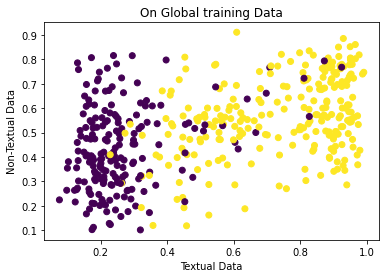

In [178]:
plt.scatter(LR_model_text.predict_proba(X_train_tfidf)[:, 1][0::10], LR_model_no_text.predict_proba(df_train[SFS_new])[:, 1][0::10], c=df_train['label'][0::10])
plt.title('On Global training Data')
plt.xlabel('Textual Data')
plt.ylabel('Non-Textual Data')

Text(0, 0.5, 'Non-Textual Data')

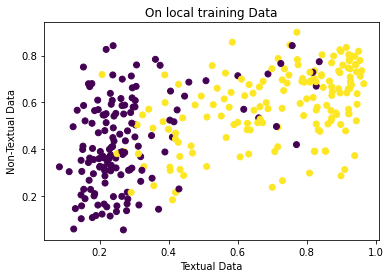

In [179]:
plt.scatter(model.predict_proba(X_local_train)[:, 1][0::10], classifier_no_text.predict_proba(df_local_train[SFS_new])[:, 1][0::10], c=df_local_train['label'][0::10])
plt.title('On local training Data')
plt.xlabel('Textual Data')
plt.ylabel('Non-Textual Data')

Text(0, 0.5, 'Non-Textual Data')

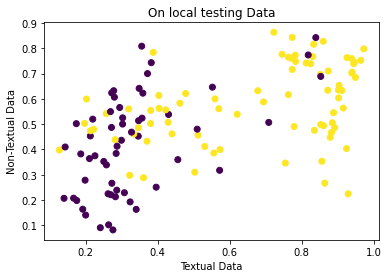

In [180]:
plt.scatter(model.predict_proba(X_local_test)[:, 1][0::10], classifier_no_text.predict_proba(df_local_test[SFS_new])[:, 1][0::10], c=df_local_test['label'][0::10])
plt.title('On local testing Data')
plt.xlabel('Textual Data')
plt.ylabel('Non-Textual Data')

As we can see, the textual_data classifier is able to segregate the data, while the data is not highly seperable with the non_textual features and inherently they get lower weights when we apply a linear classifier to it.

## Model 7 (ROC SCORE 0.87407)
Now, I try to use a different pipeline approach, wherein instead of using 'Complete_Textual_Data', I use a LR on 'text_title', 'text_url', 'text_body' and 'parsed_link' individually, and use an integrating LR on top of the 4 LR's and check its roc score. The point of this technique is to see whether weight distribution between certain individual factors positively impacts the accuracy or not.

In [181]:
vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()
vectorizer3 = TfidfVectorizer()
vectorizer4 = TfidfVectorizer()
vectorizer1.fit_transform(np.concatenate((df_train.text_title.values, df_test.text_title.values)))
vectorizer2.fit_transform(np.concatenate((df_train.text_url.values, df_test.text_url.values)))
vectorizer3.fit_transform(np.concatenate((df_train.text_body.values, df_test.text_body.values)))
vectorizer4.fit_transform(np.concatenate((df_train.parsed_link.values, df_test.parsed_link.values)))

X_local_train1 = vectorizer1.transform(df_local_train['text_title'])
X_local_train2 = vectorizer2.transform(df_local_train['text_url'])
X_local_train3 = vectorizer3.transform(df_local_train['text_body'])
X_local_train4 = vectorizer4.transform(df_local_train['parsed_link'])
X_local_test1 = vectorizer1.transform(df_local_test['text_title'])
X_local_test2 = vectorizer2.transform(df_local_test['text_url'])
X_local_test3 = vectorizer3.transform(df_local_test['text_body'])
X_local_test4 = vectorizer4.transform(df_local_test['parsed_link'])

model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()
model4 = LogisticRegression()
model1.fit(X_local_train1, df_local_train['label'])
model2.fit(X_local_train2, df_local_train['label'])
model3.fit(X_local_train3, df_local_train['label'])
model4.fit(X_local_train4, df_local_train['label'])

Integrating_Model_Local = LogisticRegression()
X_train_local_integrated = np.vstack((model1.predict_proba(X_local_train1)[:, 1], model2.predict_proba(X_local_train2)[:, 1], model3.predict_proba(X_local_train3)[:, 1], model4.predict_proba(X_local_train4)[:, 1])).T
Integrating_Model_Local.fit(X_train_local_integrated, df_local_train['label'])

X_test_local_integrated = np.vstack((model1.predict_proba(X_local_test1)[:, 1], model2.predict_proba(X_local_test2)[:, 1], model3.predict_proba(X_local_test3)[:, 1], model4.predict_proba(X_local_test4)[:, 1])).T
print(Integrating_Model_Local.score(X_test_local_integrated, df_local_test['label']))

0.786036036036036


In [182]:
X_main_train1 = vectorizer1.transform(df_train['text_title'])
X_main_train2 = vectorizer2.transform(df_train['text_url'])
X_main_train3 = vectorizer1.transform(df_train['text_body'])
X_main_train4 = vectorizer2.transform(df_train['parsed_link'])
X_main_test1 = vectorizer1.transform(df_test['text_title'])
X_main_test2 = vectorizer2.transform(df_test['text_url'])
X_main_test3 = vectorizer1.transform(df_test['text_body'])
X_main_test4 = vectorizer2.transform(df_test['parsed_link'])
model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()
model4 = LogisticRegression()
model1.fit(X_main_train1, df_train['label'])
model2.fit(X_main_train2, df_train['label'])
model3.fit(X_main_train3, df_train['label'])
model4.fit(X_main_train4, df_train['label'])
Integrating_Model = LogisticRegression()
X_train_integrated = np.vstack((model1.predict_proba(X_main_train1)[:, 1], model2.predict_proba(X_main_train2)[:, 1], model3.predict_proba(X_main_train3)[:, 1], model4.predict_proba(X_main_train4)[:, 1])).T
Integrating_Model.fit(X_train_integrated, df_train['label'])
X_test_integrated = np.vstack((model1.predict_proba(X_main_test1)[:, 1], model2.predict_proba(X_main_test2)[:, 1], model3.predict_proba(X_main_test3)[:, 1], model4.predict_proba(X_main_test4)[:, 1])).T
predictions = Integrating_Model.predict_proba(X_test_integrated)[:, 1]
print(predictions)
pred_df = pd.DataFrame(predictions, index=df_test.link_id, columns=['label'])
pred_df.to_csv('submission_Stanford_Pipeline_big_LR.csv')
pred_df.head()

[0.96258933 0.11789773 0.37800085 ... 0.26981564 0.40101902 0.17819508]


,label
link_id,
4049,0.962589
3692,0.117898
9739,0.378001
1548,0.959139
5574,0.998413


## Model 8 (roc score 0.87892)
Another approach is too club-in all the textual data of page_description feature into one column and then along with 'parsed_link' feature, using the same pipeline as the previous model, see the results.

In [183]:
l = []
for i in range(0, len(df_train)):
	l.append(" ".join([df_train['text_title'][i], df_train['text_url'][i], df_train['text_body'][i]]))
df_train['parsed_page_description'] = l

l = []
for i in range(0, len(df_test)):
	l.append(" ".join([df_test['text_title'][i], df_test['text_url'][i], df_test['text_body'][i]]))
df_test['parsed_page_description'] = l

df_local_train, df_local_test = train_test_split(df_train, shuffle=True, test_size=0.3)
vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()
vectorizer1.fit_transform(np.concatenate((df_train.parsed_page_description.values, df_test.parsed_page_description.values)))
vectorizer2.fit_transform(np.concatenate((df_train.parsed_link.values, df_test.parsed_link.values)))

X_local_train1 = vectorizer1.transform(df_local_train['parsed_page_description'])
X_local_train2 = vectorizer2.transform(df_local_train['parsed_link'])
X_local_test1 = vectorizer1.transform(df_local_test['parsed_page_description'])
X_local_test2 = vectorizer2.transform(df_local_test['parsed_link'])

model1 = LogisticRegression()
model2 = LogisticRegression()
model1.fit(X_local_train1, df_local_train['label'])
model2.fit(X_local_train2, df_local_train['label'])

Integrating_Model_Local = LogisticRegression()
X_train_local_integrated = np.vstack((model1.predict_proba(X_local_train1)[:, 1], model2.predict_proba(X_local_train2)[:, 1])).T
Integrating_Model_Local.fit(X_train_local_integrated, df_local_train['label'])

X_test_local_integrated = np.vstack((model1.predict_proba(X_local_test1)[:, 1], model2.predict_proba(X_local_test2)[:, 1])).T
print(Integrating_Model_Local.score(X_test_local_integrated, df_local_test['label']))

0.8168168168168168


In [184]:
X_main_train1 = vectorizer1.transform(df_train['parsed_page_description'])
X_main_train2 = vectorizer2.transform(df_train['parsed_link'])
X_main_test1 = vectorizer1.transform(df_test['parsed_page_description'])
X_main_test2 = vectorizer2.transform(df_test['parsed_link'])
model1 = LogisticRegression()
model2 = LogisticRegression()
model1.fit(X_main_train1, df_train['label'])
model2.fit(X_main_train2, df_train['label'])
Integrating_Model = LogisticRegression()
X_train_integrated = np.vstack((model1.predict_proba(X_main_train1)[:, 1], model2.predict_proba(X_main_train2)[:, 1])).T
Integrating_Model.fit(X_train_integrated, df_train['label'])
X_test_integrated = np.vstack((model1.predict_proba(X_main_test1)[:, 1], model2.predict_proba(X_main_test2)[:, 1])).T
predictions = Integrating_Model.predict_proba(X_test_integrated)[:, 1]
print(predictions)
pred_df = pd.DataFrame(predictions, index=df_test.link_id, columns=['label'])
pred_df.to_csv('submission_Stanford_pipeline_small_LR.csv')
pred_df.head()

[0.97719105 0.06781706 0.43791654 ... 0.25765862 0.15169905 0.10314863]


,label
link_id,
4049,0.977191
3692,0.067817
9739,0.437917
1548,0.882614
5574,0.997273
